<a href="https://colab.research.google.com/github/shinnew9/cse347-cse447RL/blob/main/lab5_approximation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5: Value-Function Approximation


## Exercise 1 SGD
Many real-world processes can be modeled as nonlinear relationships, and SGD is a standard tool to fit those models from data.  

**Example: Predicting energy consumption in a building**  
- Energy usage depends on **temperature**, **time of day**, and **occupancy**.  
- If you plot the data, the relationship might not be linear — it curves.  
- A simple way to approximate this nonlinear relation is to fit a **polynomial function** of temperature (or time).  

Now, imagine you’re collecting data continuously:  
- You get one data point (temperature, usage) at a time.  
- Instead of waiting to collect all data and computing a full batch update, you update your model incrementally with **SGD**.  
- This makes your learning **online, adaptive, and scalable** — just like in reinforcement learning.  

---

In this exercise, approximating a cubic polynomial is a simplified version of **predicting a nonlinear real-world phenomenon**.


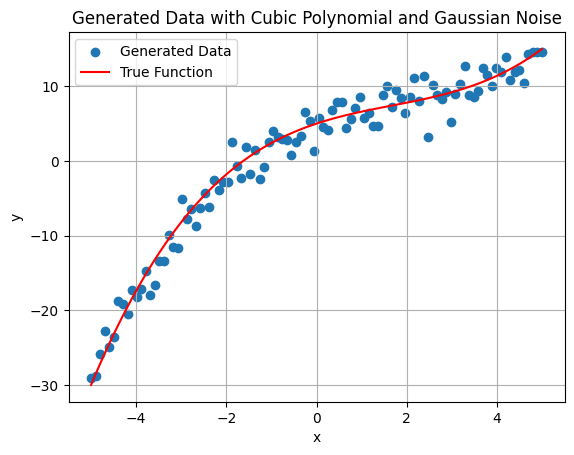

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data based on a cubic polynomial with Gaussian noise
np.random.seed(42)  # for reproducibility
n_samples = 100
x = np.linspace(-5, 5, n_samples)
# Define the true cubic polynomial functionz
def true_function(x):
  return 0.1 * x**3 - 0.5 * x**2 + 2 * x + 5

y_true = true_function(x)
noise = np.random.normal(0, 2, n_samples)  # Gaussian noise with mean 0 and std dev 2
y = y_true + noise

# Optional: Plot the generated data
plt.scatter(x, y, label='Generated Data')
plt.plot(x, y_true, color='red', label='True Function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data with Cubic Polynomial and Gaussian Noise')
plt.legend()
plt.grid(True)
plt.show()

Based on the given a dataset of input–output pairs `(x, y)` where the underlying relationship is approximately polynomial.  

a. Use a **linear model with polynomial features**: Write a function that takes an input `x` and a weight vector `w`, and return the predicted value y_hat.    
   
   - y_hat(x; w) = w0 + w1 * x + w2 * x^2 + w3 * x^3  

   where w0, w1, w2, w3 are the parameters to be learned.

b. **Loss function (Mean Squared Error)**:
   Write a function that computes the loss for one training point `(x, y)`:

     - Formula: `loss = 0.5 * (y - y_hat)**2`

c. **SGD update**:   Derive the gradient of the loss with respect to each parameter (w0, w1, w2, w3).  
   - Write a function:  

     ```python/
     def sgd_update(x, y, w, alpha):
         """
         Perform one SGD update for a single training example.
         Input:
             x (float) - input value
             y (float) - true output
             w (np.array) - current weights
             alpha (float) - learning rate
         Output:
             w (np.array) - updated weights
         """
         # TODO: compute prediction, gradient, and update weights
         return w
     ```
d. **Training loop**:
   - Loop over the dataset.  
   - At each step, update the weights using `sgd_update`.  
   - Track the training loss after each iteration.  

e. **Comparison with different learning rates**  
   - Train your model using at least three different learning rates, for example:  
     - alpha = 0.001  
     - alpha = 0.01  
     - alpha = 0.1  
   - Plot training loss vs iteration for each learning rate.  
   - Plot the final fitted polynomial curves for each learning rate on the same graph with the true dataset.

---

### Deliverables
- Code for `predict`, `mse_loss`, and `sgd_update`.  
- Training loop that runs with multiple learning rates.  
- Plot of training loss vs iteration for each learning rate.  
- Plot of the fitted polynomial vs dataset for each learning rate.  
- A short discussion:
  - How does the learning rate affect convergence speed and stability?  
  - Which learning rate gives the best balance between speed and accuracy?  

Main functions: I will work on Latex Language
<!-- - $$y$$ = ̂$$hat{y}$$
- "$$l$$ = $$(y-$$ $$hat{y}$$)"
- "Gradient: $$∇"
- "SGD Update: w <- w+ $$alpha(y- y^ -->

alpha=0.0001  w=[ 0.37719995  4.02512512 -0.74198548  2.62947623]
alpha=0.001   w=[ 2.32912024 12.36541815 -5.81916658  8.28922065]
alpha=0.01    w=[  4.72730303  11.96107527 -12.08564138   9.53460658]
alpha=0.1     w=[  5.01470382  11.92488357 -11.85300897   9.76138504]


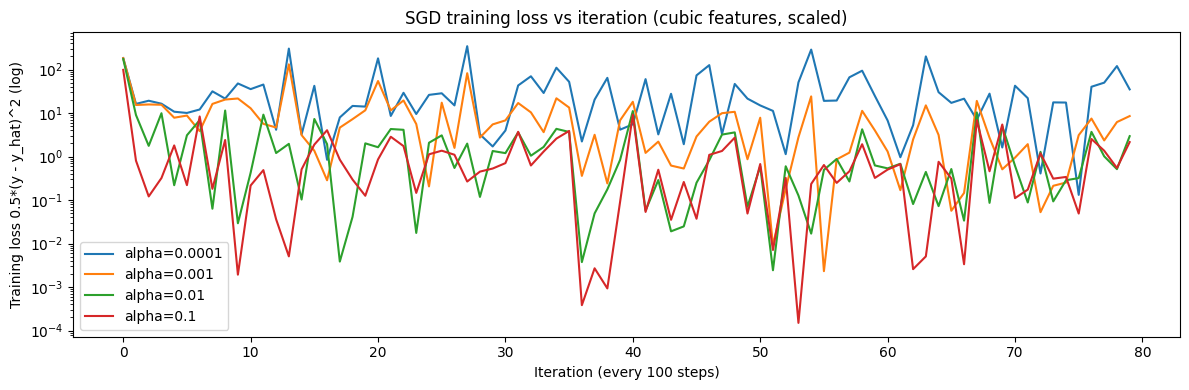

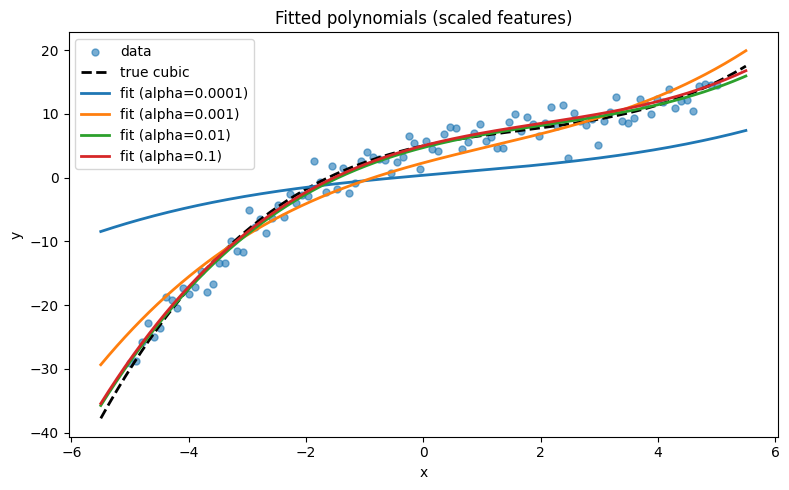

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generating Data (Given from the question)
np.random.seed(42)
n_samples = 100
x = np.linspace(-5, 5, n_samples)

def true_function(x):
    return 0.1*x**3 - 0.5*x**2 + 2*x + 5

y_true = true_function(x)
noise = np.random.normal(0, 2, n_samples)
y = y_true + noise


# Step 2: Model/Loss Function/ SGD Update
def phi(x):
    z = x / 5.0                 # scale to [-1, 1]
    return np.array([1.0, z, z**2, z**3], dtype=float)

def predict(x, w):
    Φ = phi(x)
    return np.dot(w, Φ)

def mse_loss(y, y_hat):
    return 0.5 * (y - y_hat)**2

def sgd_update(x_i, y_i, w, alpha, l2=0.0, clip=None):
    # 예측/오차
    y_hat = predict(x_i, w)
    err = (y_i - y_hat)
    Φ = phi(x_i)

    # semi-batch(원샘플) SGD: w <- w + α * err * Φ - α * λ * w
    grad = err * Φ - l2 * w

    # (선택) 그래디언트 클리핑
    if clip is not None:
        grad = np.clip(grad, -clip, clip)

    return w + alpha * grad

def train_sgd(x, y, alpha=0.01, epochs=80, shuffle=True, seed=0, l2=0.0, clip=None):
    rng = np.random.default_rng(seed)
    w = np.zeros(4, dtype=float)
    losses = []
    for ep in range(epochs):
        idx = np.arange(len(x))
        if shuffle:
            rng.shuffle(idx)
        for i in idx:
            w = sgd_update(x[idx[i]], y[idx[i]], w, alpha, l2=l2, clip=clip)
            losses.append(mse_loss(y[idx[i]], predict(x[idx[i]], w)))
    return w, np.array(losses)


# Step 3: Training Loop (comparing to other Trainings)
alphas = [0.0001, 0.001, 0.01, 0.1]
epochs = 80
results = []
for a in alphas:
    w_learned, loss_hist = train_sgd(x, y, alpha=a, epochs=epochs, shuffle=True,
                                     seed=1, l2=0.0, clip=None)
    results.append((a, w_learned, loss_hist))
    print(f"alpha={a:<7} w={w_learned}")


# Step 4: Training with multiple learning rate
plt.figure(figsize=(12,4))
for a, _, loss_hist in results:
    # 매 100스텝씩만 표시해 축 과밀 방지
    plt.plot(loss_hist[::100], label=f"alpha={a}")
plt.yscale('log')  # 폭주 시에도 비교 가능
plt.xlabel("Iteration (every 100 steps)")
plt.ylabel("Training loss 0.5*(y - y_hat)^2 (log)")
plt.title("SGD training loss vs iteration (cubic features, scaled)")
plt.legend()
plt.tight_layout()
plt.show()


# Step 5: Plotting Loss Function Curve





# Step 6: Plotting the final cursions for comaprisons
xx = np.linspace(-5.5, 5.5, 400)
yy_true = true_function(xx)

plt.figure(figsize=(8,5))
plt.scatter(x, y, s=25, alpha=0.6, label="data")
plt.plot(xx, yy_true, "k--", lw=2, label="true cubic")

for a, w, _ in results:
    yy_hat = np.array([predict(v, w) for v in xx])
    plt.plot(xx, yy_hat, lw=2, label=f"fit (alpha={a})")

plt.xlabel("x"); plt.ylabel("y")
plt.title("Fitted polynomials (scaled features)")
plt.legend()
plt.tight_layout()
plt.show()


## Exercise 2: 1000-State Random Walk with Semi-Gradient TD(0)

We will study the 1,000-state Random Walk a classic reinforcement learning benchmark from Sutton & Barto.  

- The environment has states numbered **1 to 1000**.  
- There are two **terminal states**:  
  - State `0` on the left (reward = 0)  
  - State `1001` on the right (reward = 1)  
- Each episode starts in the **middle** at state `500`.  
- At each step, the agent moves **left or right with equal probability (0.5 each)**.  
- The episode ends when the agent reaches either terminal.  
- Discount factor: **γ = 1.0** (episodic task).  


### Function Approximation
Instead of storing a separate value for each state, approximate the value function with a **linear function of the state index**: V_hat(s; w0, w1) = w0 + w1 * s



---

## Instructions
1. **Implement the environment**:  
   - You may **use AI tools such as ChatGPT** to generate the environment code (states, transitions, rewards).  
   - Make sure you understand how the environment works.  

2. **Implement the TD(0) update manually**:  
   - Do **not** use AI for this part.  
   - You must write the gradient update equations yourself using the formulas above.  

3. **Train your agent**:  
   - Run several episodes (e.g., 1000 episodes).  
   - Experiment with different step sizes (`alpha`).  

4. **Evaluate**:  
   - Plot the **true value function** `V*(s) = s/1001`.  
   - Plot your **learned approximation line** after training.  
   - Discuss whether the line captures the overall trend of the true values.  

---


## Guidelines on Using AI Tools
- You are encouraged to use AI tools (e.g., ChatGPT, Gemini, Copilot) to **generate helper code**, such as:  
  - Building the random walk environment (`reset`, `step`).  
  - Implementing the feature map φ(s).  
  - Plotting results.  
- However, **do not use AI tools to generate the TD(0) update equation**.  
  - Deriving and implementing the update is the key learning objective of this exercise.  
  - If we find code that uses an AI-generated update without understanding, the score will be zero.  


## Deliverables
- Python code for the environment and the TD(0) algorithm.  
- Plot the **true value function**: For state `s`, the probability of reaching the right terminal is:  
  `V*(s) = s / 1001`
- Plot comparing the true value function and the approximated line.  
- A short discussion:  
  - How does the approximation behave for small vs large states?  
  - How does the learning rate affect convergence?  

---

## Hints
- Normalize states to `[0,1]` before using them in the line approximation to avoid very large values for w1.  
- Start with small step sizes (e.g., 0.001–0.01).  
- The approximation will not be perfect (a line cannot match the true curve), but should capture the increasing trend.  



=== Training with alpha=0.001 ===
[TD0] ep 200/1000  return=0.0  w=[0.07371397 0.07874945]
[TD0] ep 400/1000  return=0.0  w=[0.13677902 0.1537441 ]
[TD0] ep 600/1000  return=1.0  w=[0.18312311 0.21705964]
[TD0] ep 800/1000  return=0.0  w=[0.21596349 0.27027673]
[TD0] ep 1000/1000  return=1.0  w=[0.23262621 0.31375467]

=== Training with alpha=0.003 ===
[TD0] ep 200/1000  return=0.0  w=[0.16400367 0.20188873]
[TD0] ep 400/1000  return=0.0  w=[0.23867085 0.34770622]
[TD0] ep 600/1000  return=1.0  w=[0.25614249 0.44523982]
[TD0] ep 800/1000  return=0.0  w=[0.25143207 0.51813466]
[TD0] ep 1000/1000  return=1.0  w=[0.21854114 0.57505562]

=== Training with alpha=0.01 ===
[TD0] ep 200/1000  return=0.0  w=[0.21093623 0.44730519]
[TD0] ep 400/1000  return=0.0  w=[0.16015491 0.64487401]
[TD0] ep 600/1000  return=1.0  w=[0.11080307 0.75493153]
[TD0] ep 800/1000  return=0.0  w=[0.08974313 0.83119574]
[TD0] ep 1000/1000  return=1.0  w=[0.02763105 0.89334112]


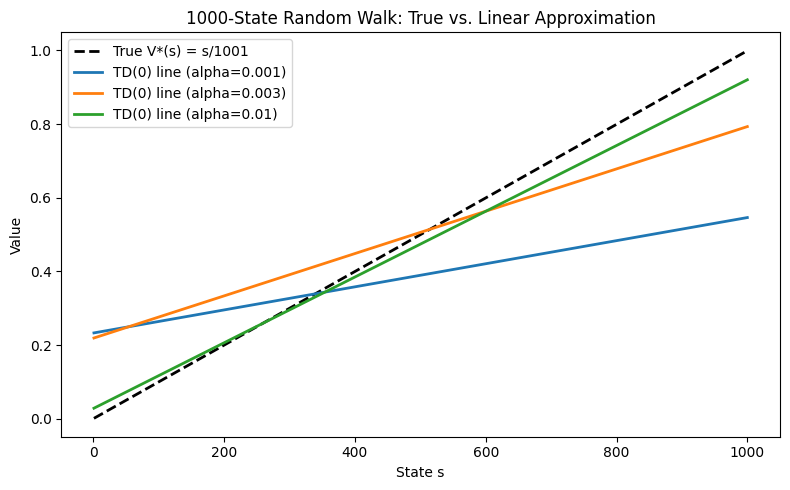

In [3]:
import numpy as np
import matplotlib.pyplot as plt


# 1) 1000-State Random Walk Env
class RandomWalk1000Env:
    """
    Nonterminal states: 1..1000
    Terminals: 0 (reward=0), 1001 (reward=1)
    Start at 500; at each step move left/right with prob 0.5
    gamma = 1.0 (episodic)
    """
    def __init__(self, n_states=1000, start=500, rng=None):
        self.n_states = n_states
        self.left_terminal  = 0
        self.right_terminal = n_states + 1  # 1001
        self.start = start
        self.rng = np.random.default_rng() if rng is None else rng
        self.s = None

    def reset(self, seed=None):
        if seed is not None:
            self.rng = np.random.default_rng(seed)
        self.s = self.start
        return self.s

    def step(self):
        # choose direction uniformly at random
        right = (self.rng.random() < 0.5)
        ns = self.s + (1 if right else -1)

        if ns == self.right_terminal:
            r, done = 1.0, True
        elif ns == self.left_terminal:
            r, done = 0.0, True
        else:
            r, done = 0.0, False

        self.s = ns
        return ns, r, done


# 2) Features & value approx
def feat(s):
    """φ(s) = [1, s/1001]. We won’t update on terminals, but defining is harmless."""
    x = s / 1001.0
    return np.array([1.0, x], dtype=np.float64)

def v_hat(w, s):
    return float(np.dot(w, feat(s)))

def v_star(s):
    """True value: prob. of reaching right terminal when starting at s."""
    return s / 1001.0


# 3) Training (TD(0) semi-gradient)
def train_td0(env, alpha=0.005, episodes=1000, gamma=1.0, seed=0, verbose_every=200):
    """
    Returns: learned weights w (shape (2,)), episode_returns (array)
    TD(0) target: r + gamma * V_hat(ns), with no bootstrap at terminal.
    Semi-gradient update: w <- w + alpha * (target - V_hat(s)) * ∇_w V_hat(s)
    For linear approx, ∇_w V_hat(s) = φ(s).
    """
    rng = np.random.default_rng(seed)
    env.rng = rng

    w = np.zeros(2, dtype=np.float64)
    ep_returns = []

    for ep in range(1, episodes+1):
        s = env.reset()
        done = False
        G = 0.0

        while not done:
            v_s = v_hat(w, s)
            ns, r, done = env.step()

            # TD target
            target = r if done else r + gamma * v_hat(w, ns)

            # --------- YOU MUST WRITE THIS LINE YOURSELF ----------
            phi = feat(s)                      # φ(s) = [1, s/1001]
            delta = target - v_s               # TD error
            w += alpha * delta * phi
            # ------------------------------------------------------

            s = ns
            G += r

        ep_returns.append(G)
        if verbose_every and ep % verbose_every == 0:
            print(f"[TD0] ep {ep}/{episodes}  return={G:.1f}  w={w}")

    return w, np.array(ep_returns, dtype=np.float64)


# 4) Run multiple alphas
if __name__ == "__main__":
    env = RandomWalk1000Env()

    alpha_list = [0.001, 0.003, 0.01]  # try small steps as hinted
    episodes   = 1000
    learned = []  # (alpha, w)

    for a in alpha_list:
        print(f"\n=== Training with alpha={a} ===")
        w, ep_ret = train_td0(env, alpha=a, episodes=episodes, gamma=1.0, seed=123)
        learned.append((a, w))


    # 5) Plot true V* and learned lines
    s_grid = np.arange(1, 1001)
    vtrue  = v_star(s_grid)

    plt.figure(figsize=(8,5))
    plt.plot(s_grid, vtrue, 'k--', lw=2, label="True V*(s) = s/1001")

    for a, w in learned:
        y = w[0] + w[1]*(s_grid/1001.0)
        plt.plot(s_grid, y, lw=2, label=f"TD(0) line (alpha={a})")

    plt.xlabel("State s")
    plt.ylabel("Value")
    plt.title("1000-State Random Walk: True vs. Linear Approximation")
    plt.legend()
    plt.tight_layout()
    plt.show()


# Exercise 3: Solving MountainCar with Tile Coding and SARSA

## Problem Description
In this exercise, you will solve the **MountainCar-v0** environment from Gym using **tile coding** for function approximation and the **SARSA algorithm** for learning.  

The **Mountain Car problem**:
- A car is stuck in a valley and is too weak to drive straight up to the goal.  
- It must build momentum by going back and forth until it can reach the goal at `position >= 0.5`.  
- **State space**: continuous (position, velocity).  
- **Actions**: {0: push left, 1: no push, 2: push right}.  
- **Reward**: -1 per step until the goal is reached.  
- **Episode ends**: when the car reaches the goal or after 200 steps.  

---

## Step 1: Environment and Random Policy (with AI help)
- Use an **AI tool (e.g., ChatGPT)** to generate starter code for:
  - Creating the Gym environment (`MountainCar-v0`).  
  - Running a **random policy** (actions chosen randomly).  
- Run this code to confirm you can interact with the environment and see episode returns.  
- This will serve as a **baseline**.  
- **Important**: Do not use AI to implement the learning algorithm.  

---

## Step 2: SARSA Algorithm with Function Approximation
Implement **SARSA (on-policy TD control)** with the following steps:

For each episode:
1. Initialize state `s`.  
2. Choose action `a` using **ε-greedy** based on Q(s,a).  
3. For each step:  
   - Take action `a`, observe `(s_next, r, done)`.  
   - Choose next action `a_next` using ε-greedy from `s_next`.  
   - Compute TD target:  
     ```
     target = r + gamma * Q(s_next, a_next)
     ```  
     (if `s_next` is terminal, then target = r).  
   - Compute TD error:  
     ```
     delta = target - Q(s,a)
     ```  
   - Update weights:  
     ```
     w <- w + alpha * delta * x(s,a)
     ```  
   - Update `s = s_next`, `a = a_next`.  
4. End episode when the goal is reached or step limit is hit.  

---

## Step 3: Experiments
- Train the agent for 500–1000 episodes.  
- Plot **episode returns (sum of rewards)** vs episodes.  
- Compare with the random policy baseline:  
  - Does SARSA learn to consistently reach the goal?  
  - How many steps does it typically take?  

---

## Deliverables
- Python code for tile coding and SARSA.  
- Plot of returns vs episodes.  
- Plot the Value function
- Short discussion (1–2 paragraphs):  
  - Effect of tile coding parameters (number of tilings, resolution).


In [4]:
# You can use the following code for tiling

import numpy as np
import gymnasium as gym

class TileCoderXY:
    """
    A TileCoder for function approximation that applies tile coding on the x and y coordinates
    of a 3D state. Instead of providing tile widths, the user provides the number of tiles per
    dimension. The tile widths are computed based on the state bounds and the number of tiles.
    The z coordinate is not used.
    """

    def __init__(self, num_tilings, tiles_per_dim, state_low, state_high):
        """
        Initialize the TileCoderXY.

        Parameters:
            num_tilings (int): Number of overlapping tilings.
            tiles_per_dim (array-like of 2 ints): Number of tiles along the x and y dimensions.
            state_low (array-like of 2 floats): Lower bounds for the x and y dimensions.
            state_high (array-like of 2 floats): Upper bounds for the x and y dimensions.
        """
        self.num_tilings = num_tilings
        self.tiles_per_dim = np.array(tiles_per_dim, dtype=int)
        self.state_low = np.array(state_low, dtype=float)
        self.state_high = np.array(state_high, dtype=float)

        # Compute the tile width for each dimension.
        # We assume that the grid spans exactly from state_low to state_high.
        # When there are N tiles, there are N-1 intervals between the boundaries.
        self.tile_width = (self.state_high - self.state_low) / (self.tiles_per_dim - 1)

        # Precompute an offset for each tiling to create overlapping grids.
        # self.offsets = [(i / self.num_tilings) * self.tile_width for i in range(self.num_tilings)]
        # self.offsets = self.compute_8_offsets()
        # self.offsets = np.stack(self._compute_offsets(), axis=0)  # shape: (num_tilings, dims)
        # Precompute offsets for each tiling.
        # For tiling i:
        #   offset_x = (((i + 0) % num_tilings) / num_tilings) * tile_width[0]
        #   offset_y = (((i + 1) % num_tilings) / num_tilings) * tile_width[1]
        offsets = np.empty((self.num_tilings, 2))
        for i in range(self.num_tilings):
            offsets[i, 0] = (((i + 0) % self.num_tilings) / self.num_tilings) * self.tile_width[0]
            offsets[i, 1] = (((i + 1) % self.num_tilings) / self.num_tilings) * self.tile_width[1]
        self.offsets = offsets


        # Precompute multiplier for flattening a 2D index.
        # For grid shape (N, M), flat index = x_index * M + y_index.
        self.multiplier = self.tiles_per_dim[1]

        # Initialize a weight vector for each tiling.
        num_tiles = np.prod(self.tiles_per_dim)
        self.weights = [np.zeros(num_tiles) for _ in range(self.num_tilings)]

    def save(self, file_name):
        np.savez(file_name + ".npz", weights=self.weights)

    def load(self, file_name):
        self.weights = np.load(file_name+".npz")["weights"]


    def compute_8_offsets(self):
        """
        Compute a list of offsets using a combination of cardinal and diagonal directions.
        The offsets include:
          - Center: [0, 0]
          - Cardinal: right, left, up, down (half-tile shifts)
          - Diagonal: up-right, up-left, down-right, down-left (half-tile shifts)

        If the number of tilings exceeds the number of unique offsets (9), the list is repeated.

        Returns:
            List of 2-element numpy arrays representing the offset for each tiling.
        """
        half_tile = self.tile_width / 8.0
        base_offsets = [
            np.array([0.0, 0.0]),  # Center (no shift)
            np.array([half_tile[0], 0.0]),  # Right
            np.array([-half_tile[0], 0.0]),  # Left
            np.array([0.0, half_tile[1]]),  # Up
            np.array([0.0, -half_tile[1]]),  # Down
            np.array([half_tile[0], half_tile[1]]),  # Up-right
            np.array([-half_tile[0], half_tile[1]]),  # Up-left
            np.array([half_tile[0], -half_tile[1]]),  # Down-right
            np.array([-half_tile[0], -half_tile[1]])  # Down-left
        ]
        offsets = []
        for i in range(self.num_tilings):
            offsets.append(base_offsets[i % len(base_offsets)])
        return offsets

    def get_tile_indices(self, state):
        """
        Compute the active tile indices for all tilings given a 2D state.

        Parameters:
            state (array-like of length 2): The input state [x, y].

        Returns:
            List of tuples (tiling_index, flat_tile_index) for each tiling.
        """
        state = np.array(state, dtype=float)  # shape: (2,)
        # Compute shifted states for all tilings in one vectorized operation.
        # Shape of shifted: (num_tilings, 2)
        shifted = (state - self.state_low) + self.offsets

        # Compute tile coordinates (integer indices) for each tiling.
        # Division is broadcasted over the offsets.
        tile_coords = (shifted / self.tile_width).astype(int)  # shape: (num_tilings, 2)

        # Clip to ensure indices are within bounds.
        tile_coords[:, 0] = np.clip(tile_coords[:, 0], 0, self.tiles_per_dim[0] - 1)
        tile_coords[:, 1] = np.clip(tile_coords[:, 1], 0, self.tiles_per_dim[1] - 1)

        # Compute flat indices for each tiling.
        # flat_index = x_index * (tiles_per_dim[1]) + y_index
        flat_indices = tile_coords[:, 0] * self.tiles_per_dim[1] + tile_coords[:, 1]

        # Return a list of (tiling_index, flat_index) tuples.
        return list(zip(range(self.num_tilings), flat_indices))


    def predict(self, state):
        """
        Compute the approximated function value for a given 3D state using tile coding on x and y.

        Parameters:
            state (array-like): The input state [x, y, z].

        Returns:
            float: The function approximation (sum of weights for the active tiles).
        """
        active_tiles = self.get_tile_indices(state)
        return sum(self.weights[tiling][idx] for tiling, idx in active_tiles)

    def update(self, state, target, alpha):
        """
        Update the weights given a state and target value.

        Parameters:
            state (array-like): The input state [x, y, z].
            target (float): The target function value.
            alpha (float): The overall learning rate.
        """
        prediction = self.predict(state)
        error = target - prediction
        # Distribute the learning rate equally among all tilings.
        alpha_per_tiling = alpha / self.num_tilings

        active_tiles = self.get_tile_indices(state)
        for tiling, idx in active_tiles:
            self.weights[tiling][idx] += alpha_per_tiling * error





In [5]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt


# TileCoderXY
class TileCoderXY:
    def __init__(self, num_tilings, tiles_per_dim, state_low, state_high):
        self.num_tilings = num_tilings
        self.tiles_per_dim = np.array(tiles_per_dim, dtype=int)
        self.state_low = np.array(state_low, dtype=float)
        self.state_high = np.array(state_high, dtype=float)
        self.tile_width = (self.state_high - self.state_low) / (self.tiles_per_dim - 1)

        offsets = np.empty((self.num_tilings, 2))
        for i in range(self.num_tilings):
            offsets[i, 0] = (((i + 0) % self.num_tilings) / self.num_tilings) * self.tile_width[0]
            offsets[i, 1] = (((i + 1) % self.num_tilings) / self.num_tilings) * self.tile_width[1]
        self.offsets = offsets

        self.multiplier = self.tiles_per_dim[1]
        num_tiles = np.prod(self.tiles_per_dim)
        self.weights = [np.zeros(num_tiles) for _ in range(self.num_tilings)]

    def get_tile_indices(self, state_3d):
        # we only use x,y = position, velocity
        state = np.array(state_3d[:2], dtype=float)
        shifted = (state - self.state_low) + self.offsets
        tile_coords = (shifted / self.tile_width).astype(int)
        tile_coords[:, 0] = np.clip(tile_coords[:, 0], 0, self.tiles_per_dim[0] - 1)
        tile_coords[:, 1] = np.clip(tile_coords[:, 1], 0, self.tiles_per_dim[1] - 1)
        flat_indices = tile_coords[:, 0] * self.tiles_per_dim[1] + tile_coords[:, 1]
        return list(zip(range(self.num_tilings), flat_indices))

    def predict(self, state_3d):
        active = self.get_tile_indices(state_3d)
        return sum(self.weights[t][i] for t, i in active)

    def update(self, state_3d, target, alpha):
        pred = self.predict(state_3d)
        err = target - pred
        alpha_per = alpha / self.num_tilings
        for t, i in self.get_tile_indices(state_3d):
            self.weights[t][i] += alpha_per * err


# Q(s,a) Approximate Wrapper: Time Coder per each Actions
class ActionValueTileCoder:
    def __init__(self, n_actions, num_tilings, tiles_per_dim, state_low, state_high):
        self.nA = n_actions
        self.models = [
            TileCoderXY(num_tilings, tiles_per_dim, state_low, state_high)
            for _ in range(n_actions)
        ]

    def q(self, state, a):
        return self.models[a].predict(state)

    def update(self, state, a, target, alpha):
        self.models[a].update(state, target, alpha)

    def greedy_action(self, state):
        qs = [self.q(state, a) for a in range(self.nA)]
        a_star = int(np.argmax(qs))
        return a_star, float(qs[a_star])


# Step 1: Random policy baseline
def run_random_baseline(episodes=20, seed=0):
    env = gym.make("MountainCar-v0")
    rng = np.random.default_rng(seed)
    returns = []
    for ep in range(episodes):
        s, _ = env.reset(seed=int(rng.integers(0, 10_000)))
        G = 0.0
        terminated = truncated = False
        while not (terminated or truncated):
            a = env.action_space.sample()
            s, r, terminated, truncated, _ = env.step(a)
            G += r
        returns.append(G)
    env.close()
    print(f"[Random] mean return over {episodes} eps: {np.mean(returns):.2f} ± {np.std(returns):.2f}")
    return np.array(returns)


# ε-greedy (Helper)
def epsilon_greedy(avfa, state, eps, rng):
    if rng.random() < eps:
        return int(rng.integers(0, avfa.nA))
    a_star, _ = avfa.greedy_action(state)
    return a_star


# Step 2: SARSA with tile coding (학습 핵심은 TODO YOU)
def train_sarsa_tilecoding(
    episodes=500,
    alpha=0.3,
    gamma=0.99,
    eps_start=1.0,
    eps_end=0.05,
    eps_decay=0.995,
    num_tilings=8,
    tiles_per_dim=(8, 8),
    seed=1
)
    env = gym.make("MountainCar-v0")
    rng = np.random.default_rng(seed)

    # Fixing up the Running Environment (Fixing up MountainCar)
    pos_low, pos_high = env.observation_space.low[0],  env.observation_space.high[0]
    vel_low, vel_high = env.observation_space.low[1],  env.observation_space.high[1]
    state_low  = (pos_low, vel_low)
    state_high = (pos_high, vel_high)

    avfa = ActionValueTileCoder(
        n_actions=env.action_space.n,
        num_tilings=num_tilings,
        tiles_per_dim=tiles_per_dim,
        state_low=state_low,
        state_high=state_high
    )

    eps = float(eps_start)
    returns = []

    for ep in range(episodes):
        s, _ = env.reset(seed=int(rng.integers(0, 10_000)))
        a = epsilon_greedy(avfa, s, eps, rng)   # (YOU: 직접 작성해도 됨)
        G = 0.0

        for t in range(200):  # MountainCar max_steps=200
            ns, r, terminated, truncated, _ = env.step(a)
            done = terminated or truncated
            G += r

            # ---------- TODO (YOU): SARSA 핵심 3줄 ----------
            # 1) a_next: ε-greedy에서 선택
            # a_next = ???

            # 2) target: if done then r, else r + gamma * Q(ns, a_next)
            # target = ???

            # 3) delta = target - Q(s, a); w 업데이트: w <- w + alpha * delta * x(s,a)
            # 여기서는 avfa.update(s, a, target, alpha)가 바로 그 식을 수행
            # delta를 직접 쓸 필요 없이 target만 넘기면 됨 (내부에서 prediction과 error 사용)
            # avfa.update(s, a, target, alpha)
            # ----------------------------------------------

            # 상태/행동 갱신
            s, a = ns, a if done else a_next
            if done:
                break

        returns.append(G)
        eps = max(eps_end, eps * eps_decay)

        if (ep+1) % 50 == 0:
            print(f"[SARSA] ep {ep+1}/{episodes}  return={G:.1f}  eps={eps:.3f}")

    env.close()
    return avfa, np.array(returns)


# Step 3: Plotting helpers
def plot_returns(curves, title="Episode returns"):
    plt.figure(figsize=(9,4))
    for label, arr in curves.items():
        plt.plot(arr, label=label, alpha=0.9)
    plt.xlabel("Episode"); plt.ylabel("Return (sum of rewards)")
    plt.title(title); plt.legend(); plt.tight_layout(); plt.show()

def plot_value_heatmap(avfa, state_low, state_high, grid=(50,50), title="Value V(s)=max_a Q(s,a)"):
    xs = np.linspace(state_low[0], state_high[0], grid[0])
    ys = np.linspace(state_low[1], state_high[1], grid[1])
    V = np.zeros((grid[1], grid[0]))
    for i, xv in enumerate(xs):
        for j, yv in enumerate(ys):
            s = np.array([xv, yv])
            # z dummy for interface? (우리 TileCoderXY는 3D 입력을 기대, 그러나 앞 2D만 사용)
            # predict는 (x,y,_)에서 앞 2개만 사용하므로 2D로 넘겨도 잘 동작하도록 작성되어 있음
            _, vmax = avfa.greedy_action(s)
            V[j, i] = vmax
    plt.figure(figsize=(6,4))
    im = plt.imshow(V, origin='lower',
                    extent=[state_low[0], state_high[0], state_low[1], state_high[1]],
                    aspect='auto', cmap='viridis')
    plt.colorbar(im, label="V(s)")
    plt.xlabel("position"); plt.ylabel("velocity")
    plt.title(title)
    plt.tight_layout(); plt.show()


# Main: run baseline + SARSA (Template)
if __name__ == "__main__":
    # Step 1: Random baseline
    rand_returns = run_random_baseline(episodes=20, seed=0)

    # Step 2: SARSA + tile coding (핵심 3줄 채우고 실행!)
    avfa, sarsa_returns = train_sarsa_tilecoding(
        episodes=800,           # suggested for running 500~1000
        alpha=0.3,              # using relatively bigger α in TIle Coding
        gamma=0.99,
        eps_start=1.0, eps_end=0.05, eps_decay=0.995,
        num_tilings=8, tiles_per_dim=(10,10),
        seed=1
    )

    # Step 3: Compare returns
    plot_returns({"Random": rand_returns, "SARSA-tile": sarsa_returns},
                 title="MountainCar-v0: returns (random vs SARSA tile-coding)")

    # Plot Value function heatmap (greedy w.r.t. Q)
    # MountainCar bounds:
    state_low  = (-1.2, -0.07)
    state_high = ( 0.6,  0.07)
    plot_value_heatmap(avfa, state_low, state_high, grid=(80,80),
                       title="Greedy state-value V(s)=max_a Q(s,a)")


[Random] mean return over 20 eps: -200.00 ± 0.00


NameError: name 'a_next' is not defined